# Run Any Kind of Logistic Regression (Binomial, Multinomial, etc.)

### Authors: Calvin Howard.

#### Last updated: March 16, 2024

Use this to run/test a statistical model on a spreadsheet.

Notes:
- To best use this notebook, you should be familar with GLM design and Contrast Matrix design. See this webpage to get started:
[FSL's GLM page](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM)

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

Prep Output Directory

In [1]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_5/results/ctrl_vs_dz/train'

Import Data

In [2]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_5/differential_diagnoses_train_jan6.csv'
sheet = None

In [3]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()
data_df

,DX,subid,AD,SV,LBD,BV,PNFA,CBS,PSP,CN,Peak_Values,CN_1
0,AD,002_S_5018,0.267421,0.232926,0.198533,0.065369,0.002661,-0.046144,0.071820,0.055346,3.958120,Disease
1,AD,003_S_4136,0.250153,0.166423,0.309973,0.239407,-0.047390,-0.064591,0.075278,0.071814,6.707466,Disease
2,AD,003_S_4152,0.261028,-0.006894,0.245157,0.380777,0.341750,0.108512,0.148428,0.012038,4.700880,Disease
3,AD,003_S_4373,0.268129,0.105613,-0.078858,-0.003165,0.187302,0.141428,-0.063145,0.057640,5.562066,Disease
4,AD,003_S_4892,0.118606,0.084527,0.043235,-0.044912,-0.027455,-0.069984,-0.086865,0.012354,3.858787,Disease
...,...,...,...,...,...,...,...,...,...,...,...,...
493,CN,130_S_4343,-0.030808,-0.013928,-0.033256,-0.037940,0.022538,-0.075957,-0.047576,-0.006485,3.438541,Control
494,CN,135_S_4566,0.078873,-0.010004,-0.249895,-0.188369,0.006067,0.203328,-0.017838,0.059125,3.360313,Control
495,CN,137_S_4520,-0.075508,-0.088926,-0.127744,-0.156914,-0.050925,0.013258,-0.081796,0.091410,2.120198,Control
496,CN,137_S_4632,-0.090119,0.001864,-0.006596,0.052634,0.005347,-0.039782,0.006822,-0.043730,2.321065,Control


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [4]:
drop_list = ['DX']

In [5]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,DX,subid,AD,SV,LBD,BV,PNFA,CBS,PSP,CN,Peak_Values,CN_1
0,AD,002_S_5018,0.267421,0.232926,0.198533,0.065369,0.002661,-0.046144,0.071820,0.055346,3.958120,Disease
1,AD,003_S_4136,0.250153,0.166423,0.309973,0.239407,-0.047390,-0.064591,0.075278,0.071814,6.707466,Disease
2,AD,003_S_4152,0.261028,-0.006894,0.245157,0.380777,0.341750,0.108512,0.148428,0.012038,4.700880,Disease
3,AD,003_S_4373,0.268129,0.105613,-0.078858,-0.003165,0.187302,0.141428,-0.063145,0.057640,5.562066,Disease
4,AD,003_S_4892,0.118606,0.084527,0.043235,-0.044912,-0.027455,-0.069984,-0.086865,0.012354,3.858787,Disease
...,...,...,...,...,...,...,...,...,...,...,...,...
493,CN,130_S_4343,-0.030808,-0.013928,-0.033256,-0.037940,0.022538,-0.075957,-0.047576,-0.006485,3.438541,Control
494,CN,135_S_4566,0.078873,-0.010004,-0.249895,-0.188369,0.006067,0.203328,-0.017838,0.059125,3.360313,Control
495,CN,137_S_4520,-0.075508,-0.088926,-0.127744,-0.156914,-0.050925,0.013258,-0.081796,0.091410,2.120198,Control
496,CN,137_S_4632,-0.090119,0.001864,-0.006596,0.052634,0.005347,-0.039782,0.006822,-0.043730,2.321065,Control


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [6]:
data_df.columns

Index(['DX', 'subid', 'AD', 'SV', 'LBD', 'BV', 'PNFA', 'CBS', 'PSP', 'CN',
       'Peak_Values', 'CN_1'],
      dtype='object')

Set the parameters for dropping rows

In [7]:
column = 'Cohort'  # The column you'd like to evaluate
condition = 'equal'  # The condition to check ('equal', 'above', 'below', 'not')
value = 0 # The value to drop if found

In [8]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

KeyError: 'Cohort'

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['DX', 'SUBID'] # ['Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_'] #['Age']


In [ ]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

# 00 - Define Your Formula

This is the formula relating outcome to predictors, and takes the form:
- y = B0 + B1 + B2 + B3 + . . . BN

It is defined using the columns of your dataframe instead of the variables above:
- 'Apples_Picked ~ hours_worked + owns_apple_picking_machine'

____
**Normal Logistic**
- Assesses the impact of multiple predictors on an outcome.
- formula = 'Binary Outcome ~ Predictor1 + Predictor2'

**Multiple Logistic**
- Assesses the impact of predictor on an outcome.
- formula = 'Ordinal Outcome ~ Predictor1 + Predictor2'

____
Use the printout below to design your formula. 
- Left of the "~" symbol is the thing to be predicted. 
- Right of the "~" symbol are the predictors. 
- ":" indicates an interaction between two things. 
- "*" indicates and interactions AND it accounts for the simple effects too. 
- "+" indicates that you want to add another predictor. 

In [9]:
data_df.columns

Index(['DX', 'subid', 'AD', 'SV', 'LBD', 'BV', 'PNFA', 'CBS', 'PSP', 'CN',
       'Peak_Values', 'CN_1'],
      dtype='object')

In [11]:
formula = "DX ~ AD + SV + LBD + BV + PNFA + CBS + PSP + CN + Peak_Values"

# 02 - Visualize Your Design Matrix

This is the explanatory variable half of your regression formula
_______________________________________________________
Create Design Matrix: Use the create_design_matrix method. You can provide a list of formula variables which correspond to column names in your dataframe.

- design_matrix = palm.create_design_matrix(formula_vars=["var1", "var2", "var1*var2"])
- To include interaction terms, use * between variables, like "var1*var2".
- By default, an intercept will be added unless you set intercept=False
- **don't explicitly add the 'intercept' column. I'll do it for you.**

In [12]:
# Define the design matrix
outcome_matrix, design_matrix = cal_palm.define_design_matrix(formula, data_df)
design_matrix

,Intercept,AD,SV,LBD,BV,PNFA,CBS,PSP,CN,Peak_Values
0,1.0,0.267421,0.232926,0.198533,0.065369,0.002661,-0.046144,0.071820,0.055346,3.958120
1,1.0,0.250153,0.166423,0.309973,0.239407,-0.047390,-0.064591,0.075278,0.071814,6.707466
2,1.0,0.261028,-0.006894,0.245157,0.380777,0.341750,0.108512,0.148428,0.012038,4.700880
3,1.0,0.268129,0.105613,-0.078858,-0.003165,0.187302,0.141428,-0.063145,0.057640,5.562066
4,1.0,0.118606,0.084527,0.043235,-0.044912,-0.027455,-0.069984,-0.086865,0.012354,3.858787
...,...,...,...,...,...,...,...,...,...,...
493,1.0,-0.030808,-0.013928,-0.033256,-0.037940,0.022538,-0.075957,-0.047576,-0.006485,3.438541
494,1.0,0.078873,-0.010004,-0.249895,-0.188369,0.006067,0.203328,-0.017838,0.059125,3.360313
495,1.0,-0.075508,-0.088926,-0.127744,-0.156914,-0.050925,0.013258,-0.081796,0.091410,2.120198
496,1.0,-0.090119,0.001864,-0.006596,0.052634,0.005347,-0.039782,0.006822,-0.043730,2.321065


Check multicollinearity in design matrix

In [13]:
#Multico. Check
from calvin_utils.statistical_utils.statistical_measurements import calculate_vif
calculate_vif(design_matrix)

,features,VIF
0,Intercept,12.752914
1,AD,4.810042
2,SV,4.958863
3,LBD,10.211004
4,BV,11.448897
5,PNFA,6.446438
6,CBS,9.348769
7,PSP,14.075384
8,CN,1.467823
9,Peak_Values,1.430936


# 03 - Visualize Your Dependent Variable

I have generated this for you based on the formula you provided

In [14]:
# outcome_matrix = outcome_matrix.iloc[:, [0]]
outcome_matrix

,DX[AD],DX[BV],DX[CBS],DX[CN],DX[LBD],DX[PNFA],DX[PSP],DX[SV]
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
493,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
494,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
495,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**CRITICAL IN MULTINOMIAL LOGISTIC REGRESSION**
- A multinomial logistic reg. will set results RELATIVE TO A REFERENCE class. 
- The reference class is the first classification the multinomial encounters.
- **Especially if you are running a multinomial logistic regression, set your reference class below**

In [15]:
reference = 'Diagnosis[Control]'

# 04 - Run the Regression

Regression Results Are Displayed Below

- This will run a binomial or a multinomial logit dependig on your outcome matrix. 
- A multinomial logit will display N-1 categories, where N is the number of potential classifications you have. This occurs because everything is set in reference to that class. 
- So, the reference will either be the first column in your outcomes_matrix, or you can manually set it first.

In [16]:
from calvin_utils.statistical_utils.logistic_regression import LogisticRegression
logreg = LogisticRegression(outcome_matrix, design_matrix)
results = logreg.run()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.699650
         Iterations 10
----INTERPRETATION KEY----
reference_category : DX[AD]
y=0 : DX[BV]
y=1 : DX[CBS]
y=2 : DX[CN]
y=3 : DX[LBD]
y=4 : DX[PNFA]
y=5 : DX[PSP]
y=6 : DX[SV]
<bound method MultinomialResults.summary2 of <statsmodels.discrete.discrete_model.MultinomialResults object at 0x104554cd0>>


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: MNLogit
==================================================================
Model:              MNLogit          Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.618      
Date:               2025-01-28 15:04 AIC:              836.8512   
No. Observations:   498              BIC:              1131.5932  
Df Model:           63               Log-Likelihood:   -348.43    
Df Residuals:       428              LL-Null:          -911.19    
Converged:          1.0000           LLR p-value:      2.1723e-194
No. Iterations:     10.0000          Scale:            1.0000     
------------------------------------------------------------------
     y = 0        Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
  Intercept       -4.0940   1.2853 -3.1852 0.0014  -6.6132 -1.5748
         AD      -12.5275   4.4881 -2.7913 0.0052 -21.3240 -3.7311
         SV        4.3239   3.7716  1.1464 0.2516  -3.0683 11.7160
        LBD       -7.8814   6.3703 -1.2372 0.2160 -20.3669  4.6041
         BV       19.6449   5.7579  3.4118 0.0006   8.3596 30.9303
       PNFA       -0.7875   4.3790 -0.1798 0.8573  -9.3701  7.7951
        CBS       12.5305   7.9212  1.5819 0.1137  -2.9948 28.0558
        PSP       -9.3972   8.3789 -1.1215 0.2621 -25.8195  7.0252
         CN       -7.7608   8.4559 -0.9178 0.3587 -24.3341  8.8125
Peak_Values        0.5056   0.2252  2.2447 0.0248   0.0641  0.9470
------------------------------------------------------------------
     y = 1       Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
------------------------------------------------------------------
  Intercept       1.4384   1.0952  1.3133 0.1891  -0.7082   3.5849
         AD     -25.4555   5.0220 -5.0688 0.0000 -35.2985 -15.6126
         SV       1.8988   4.5053  0.4215 0.6734  -6.9313  10.7289
        LBD       3.2962   5.9470  0.5543 0.5794  -8.3597  14.9521
         BV      -7.9420   5.9849 -1.3270 0.1845 -19.6723   3.7883
       PNFA      -4.9190   5.5473 -0.8867 0.3752 -15.7916   5.9536
        CBS      22.9637   7.3010  3.1453 0.0017   8.6540  37.2734
        PSP       9.7186   7.6356  1.2728 0.2031  -5.2468  24.6840
         CN      -9.5954   7.9889 -1.2011 0.2297 -25.2534   6.0626
Peak_Values      -0.7097   0.2669 -2.6590 0.0078  -1.2328  -0.1866
------------------------------------------------------------------
     y = 2       Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
------------------------------------------------------------------
  Intercept       4.9887   0.7375  6.7641 0.0000   3.5432   6.4343
         AD     -22.3509   3.4403 -6.4968 0.0000 -29.0938 -15.6081
         SV       2.6606   2.8118  0.9462 0.3440  -2.8505   8.1718
        LBD       3.4262   3.6706  0.9334 0.3506  -3.7680  10.6204
         BV      -3.1989   3.6237 -0.8828 0.3774 -10.3012   3.9034
       PNFA      -3.8315   3.2975 -1.1620 0.2453 -10.2944   2.6314
        CBS      10.4033   4.9123  2.1178 0.0342   0.7753  20.0314
        PSP      -3.1180   5.0201 -0.6211 0.5345 -12.9572   6.7212
         CN      -9.1201   5.2484 -1.7377 0.0823 -19.4069   1.1667
Peak_Values      -0.6132   0.1695 -3.6169 0.0003  -0.9455  -0.2809
------------------------------------------------------------------
     y = 3        Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
  Intercept       -4.4285   1.8423 -2.4038 0.0162  -8.0393 -0.8177
         AD      -21.4582   5.9588 -3.6011 0.0003 -33.1372 -9.7792
         SV       -2.4746   5.3238 -0.4648 0.6421 -12.9090  7.9598
        LBD       50.2366   8.6453  5.8108 0.0000  33.2921 67.1811
         BV      -17.2898   6.7624 -2.5567 0.0106 -30.5439 -4.0357
       PNFA        1.1154   5.9053  0.1889 0.8502 -10.4587 12.6895
        CBS       36.8953  10.0106  3.6856 0.0002  17.2749 56.5156
        PSP      -25.45

# 6 - Receiver Operating Characteristic
- The ROC considers clasisfications acoss ALL POSSIBLE PROBABILITIES, demonstrating what is ultiamtely accomplishable at the best possible threshold

- First curve is ROC for classifcation of each class with respect to all other classes
- Second Curve (Macro Average) is basically a meta-analytic ROC with equal weight per class.
- Third Curve (Micro Average) is basically a meta-analytic ROC with weight proportional to class sample

Taking maximum probability as prediction.
There are 112.0 observations for DX[AD]
There are 45.0 observations for DX[BV]
There are 31.0 observations for DX[CBS]
There are 170.0 observations for DX[CN]
There are 51.0 observations for DX[LBD]
There are 28.0 observations for DX[PNFA]
There are 32.0 observations for DX[PSP]
There are 29.0 observations for DX[SV]


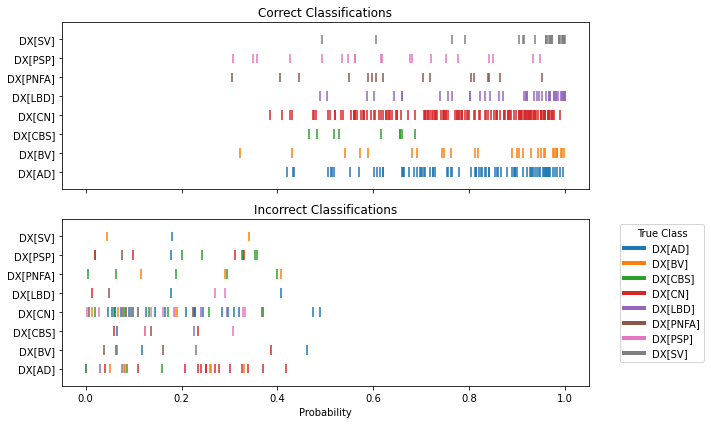

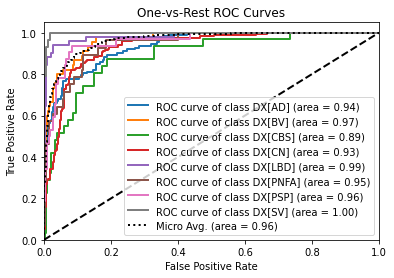

Optimal Thresholds: 
 {0: 0.4076527718759211, 1: 0.04519823572132978, 2: 0.05853237938954306, 3: 0.40922094244631285, 4: 0.22560689416970955, 5: 0.0382835673375143, 6: 0.12473619684019074, 7: 0.06460446041397211}


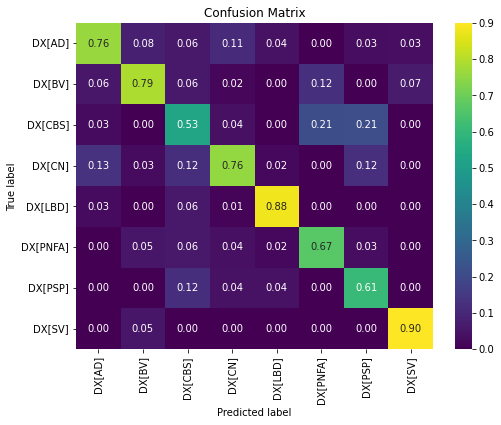

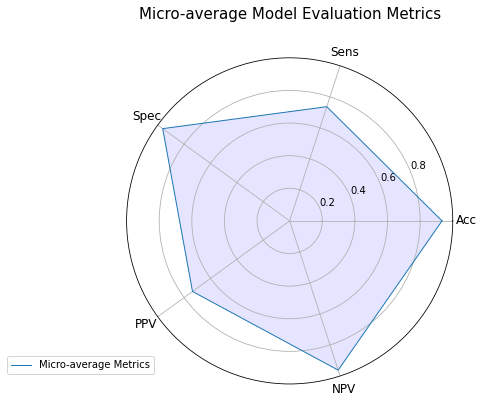

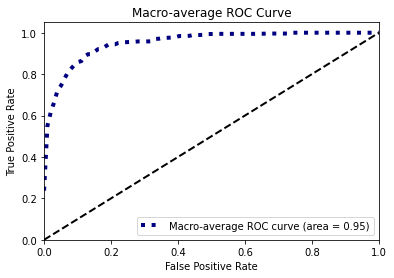

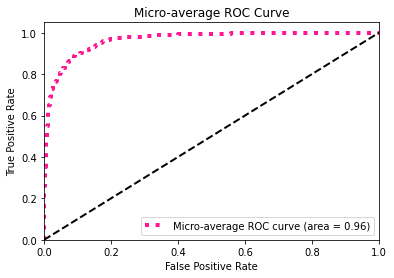

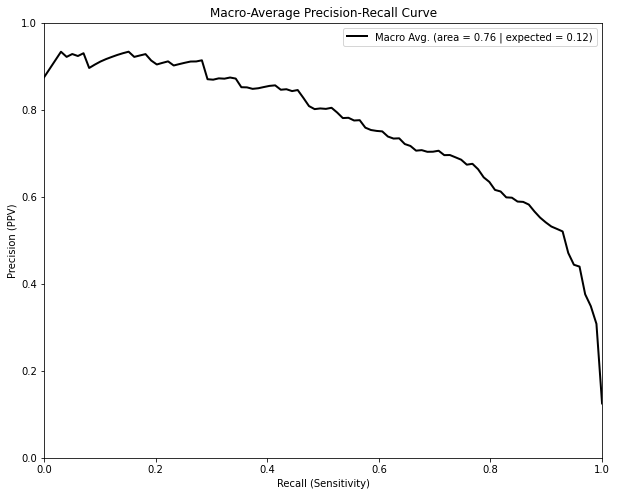

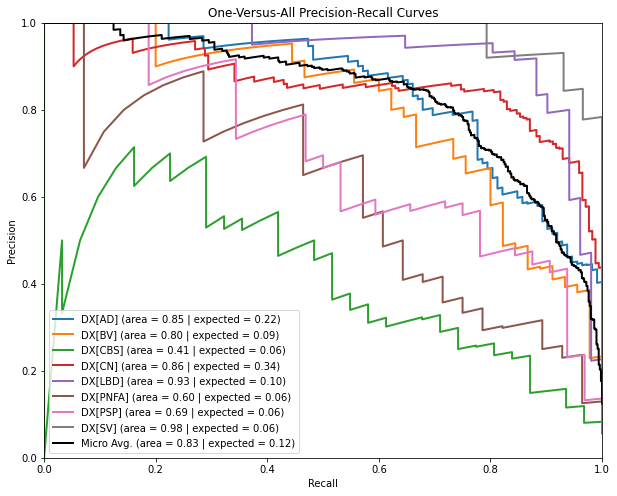

In [17]:
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
evaluator = ComprehensiveMulticlassROC(fitted_model=results, observation_df=outcome_matrix, normalization='pred', thresholds=None, out_dir=out_dir)
evaluator.run()

ADVANCED
- code specific manual thresholds to intervene upon classifications

Step 1: relate integer (index) to class

In [16]:
# evaluator.relate_index_to_class()

Step 2: in a dictionary of the indices (corresponding to class), key in the lambda function to edit the probability. 
- Code from left to right, giving priority to each method. 
- Example:
```
>thresholds = {
>            0: lambda probs: 0 if probs[0] > 0.5 else (1 if probs[0] > 0.25 else 2),  # Adjust class_0 predictions
>            1: lambda probs: None,  # No threshold adjustment for class_1
>            2: lambda probs: None   # No threshold adjustment for class_2
>        }
```

In [ ]:
thresholds = {
    0: lambda prob: 0,  # Always keep class 0
    1: lambda prob: 1,  # Always keep class 1
    2: lambda prob: 2 if prob[2] > 0.5 else (1 if prob[1] > 0.3 else 0)  # Conditional adjustment for class 2
}


Step 3: Check the effect

In [ ]:
# from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
# evaluator = ComprehensiveMulticlassROC(fitted_model=results, observation_df=outcome_matrix, normalization='pred', thresholds=thresholds, out_dir=out_dir)
# evaluator.run()

Step 4: YOU MUST LOOCV AND VALIDATE IN OUT-OF-SAMPLE DATA.
- add thresholds as an argument to any further calls to ComprehensiveMulticlassROC

Bootstrap the Micro Average AUC

In [ ]:
import matplotlib
from calvin_utils.statistical_utils.classification_statistics import bootstrap_auc
matplotlib.use('Agg')  # Use a non-interactive backend

mean_auc, lower_ci, upper_ci = bootstrap_auc(outcome_matrix, design_matrix, n_iterations=1000)
print(f'Mean AUC: {mean_auc}, 95% CI: ({lower_ci}, {upper_ci})')

Permutation Test Two AUCs

In [ ]:
data_df.columns

In [ ]:
f1 = "Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF"
f2 = "Diagnosis ~ CerebellumGM + ParietalGM + MTLGM + OccipitalGM + FrontalGM + temp_ins_gm + SubcortexGM"

In [ ]:
import matplotlib
matplotlib.use('Agg')  # Use a non-interactive backend
from calvin_utils.statistical_utils.classification_statistics import permute_auc_difference
obs_diff, lower_ci, upper_ci, p_value = permute_auc_difference(data_df, formula1=f1, 
                                                                  formula2=f2,
                                                                  cal_palm=cal_palm, n_iterations=1000)
print(f'Observde AUC Difference: {obs_diff}, 95% CI: ({lower_ci}, {upper_ci}), p-value: {p_value}')

# 06 - Visualize the Regression as a Forest Plot
- This will probably look poor if you ran a regression without standardizing your data. 

In [ ]:
from calvin_utils.statistical_utils.statistical_measurements import MultinomialForestPlot

multinomial_forest = MultinomialForestPlot(model=results, sig_digits=2, out_dir='/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_5/results/ctrl_vs_dz/train/forest_plots', table=False)
multinomial_forest.run()

# 07 - Generate Partial Dependence Plots

In [ ]:
from calvin_utils.statistical_utils.statistical_measurements import PartialDependencePlot
pdp = PartialDependencePlot(formula=formula, data_df=data_df, model=results, design_matrix=design_matrix, outcomes_df=outcome_matrix, data_range=None, out_dir='/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_5/results/ctrl_vs_dz/train/forest_plots', marginal_method='mean', debug=False)
pdp.run()

# 08 - Visualize the Partial Regression Plots

In [ ]:
from calvin_utils.statistical_utils.statistical_measurements import PartialRegressionPlot
partial_plot = PartialRegressionPlot(model=results, design_matrix=design_matrix, out_dir=out_dir, palette=None)
partial_plot = partial_plot.run()

# 09 - LOOCV

In [ ]:
import pandas as pd
from calvin_utils.statistical_utils.logistic_regression import LogisticRegression
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
y_true, y_pred, test_prob = LogisticRegression.run_loocv(outcome_matrix, design_matrix)
loocv_evaluator = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=pd.DataFrame(test_prob, columns=outcome_matrix.columns), observation_df=outcome_matrix, normalization='pred', thresholds=None, out_dir=out_dir)
loocv_evaluator.run()

# 10 - Predict Unseen Data

In [18]:
new_csv_path='/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_5/differential_diagnoses_test_jan6.csv'

Optional - Get New Data

In [19]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# # Instantiate the PalmPrepararation class
new_palm = CalvinStatsmodelsPalm(input_csv_path=new_csv_path, output_dir='/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_5/results/test', sheet=sheet)
# Call the process_nifti_paths method
other_df = new_palm.read_and_display_data()
other_df

,DX,subid,AD,SV,LBD,BV,PNFA,CBS,PSP,CN,Peak_Values,CN_1
0,AD,003_S_5187,0.105065,-0.163977,-0.140314,-0.072121,0.088568,0.188778,-0.020847,0.133512,4.229827,Disease
1,AD,005_S_5119,0.304747,0.151812,0.117329,0.147603,0.007647,-0.027048,0.016932,0.127041,5.060092,Disease
2,AD,006_S_4153,0.296657,0.268457,-0.030366,-0.120097,-0.076581,-0.105002,-0.156144,-0.010260,5.256363,Disease
3,AD,009_S_5037,0.265873,0.246917,0.238238,0.142592,-0.007056,0.033291,0.128012,-0.027412,4.345522,Disease
4,AD,009_S_5252,0.274843,0.152793,0.348950,0.335721,0.076516,0.087219,0.204269,-0.000956,4.069436,Disease
...,...,...,...,...,...,...,...,...,...,...,...,...
124,CN,1_S_0287,0.011137,0.012862,-0.063701,-0.012159,-0.013539,-0.056139,-0.019900,0.048292,3.137433,Control
125,CN,1_S_0299,0.011907,-0.029430,-0.096752,-0.055195,0.093134,0.067372,-0.042429,0.079797,3.197483,Control
126,CN,1_S_0329,0.045867,0.037496,0.065652,0.145146,0.149163,0.062082,0.113210,0.032453,3.825414,Control
127,CN,136_S_4433,-0.047110,-0.108067,-0.203377,-0.148504,-0.071928,-0.013961,-0.147820,0.010873,3.015902,Control


In [20]:
# formula

In [21]:
# column_renaming_map = {
#                        'Mesial_Temporal': 'mesial_temporal_eh', 
#                        'parietal': 'parietal_eh', 
#                        'frontal': 'frontal_eh',
#                        'temporal': 'temporal_eh', 
#                        'ventricle':'ventricle_eh',
#                        'occipital': 'occipital_eh'}

In [22]:
# other_df.rename(columns=column_renaming_map, inplace=True)

Prepare Data

In [23]:
# Define the design matrix
# subset_df = other_df.groupby('DIAGNOSIS_BL').apply(lambda x: x.sample(min(len(x), 200))).reset_index(drop=True)
import pandas as pd
other_outcome_matrix, other_design_matrix = cal_palm.define_design_matrix(formula, other_df)

# Ensure both matrices have the same columns
if len(other_outcome_matrix.columns) != len(outcome_matrix.columns):
    # Create a zero-filled DataFrame with the same columns as outcome_matrix
    zero_df = pd.DataFrame(0, index=other_outcome_matrix.index, columns=outcome_matrix.columns)
    
    # Fill zero_df with values from other_outcome_matrix where columns exist
    common_columns = other_outcome_matrix.columns.intersection(outcome_matrix.columns)
    zero_df.loc[:, common_columns] = other_outcome_matrix.loc[:, common_columns]
    
    other_outcome_matrix = zero_df

other_design_matrix


,Intercept,AD,SV,LBD,BV,PNFA,CBS,PSP,CN,Peak_Values
0,1.0,0.105065,-0.163977,-0.140314,-0.072121,0.088568,0.188778,-0.020847,0.133512,4.229827
1,1.0,0.304747,0.151812,0.117329,0.147603,0.007647,-0.027048,0.016932,0.127041,5.060092
2,1.0,0.296657,0.268457,-0.030366,-0.120097,-0.076581,-0.105002,-0.156144,-0.010260,5.256363
3,1.0,0.265873,0.246917,0.238238,0.142592,-0.007056,0.033291,0.128012,-0.027412,4.345522
4,1.0,0.274843,0.152793,0.348950,0.335721,0.076516,0.087219,0.204269,-0.000956,4.069436
...,...,...,...,...,...,...,...,...,...,...
124,1.0,0.011137,0.012862,-0.063701,-0.012159,-0.013539,-0.056139,-0.019900,0.048292,3.137433
125,1.0,0.011907,-0.029430,-0.096752,-0.055195,0.093134,0.067372,-0.042429,0.079797,3.197483
126,1.0,0.045867,0.037496,0.065652,0.145146,0.149163,0.062082,0.113210,0.032453,3.825414
127,1.0,-0.047110,-0.108067,-0.203377,-0.148504,-0.071928,-0.013961,-0.147820,0.010873,3.015902


Predict

Evaluate

In [24]:
formula

'DX ~ AD + SV + LBD + BV + PNFA + CBS + PSP + CN + Peak_Values'

In [25]:
# thresholds = {
#     0: lambda prob: 0 if prob < 0.33 else 1,
#     1: lambda prob: 1 if prob > 0.33 else 0
# }

In [29]:
loocv_evaluator.predictions_df.to_csv('/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/for_grace/prediction_probs.csv')

Taking maximum probability as prediction.
There are 28.0 observations for DX[AD]
There are 12.0 observations for DX[BV]
There are 8.0 observations for DX[CBS]
There are 43.0 observations for DX[CN]
There are 13.0 observations for DX[LBD]
There are 8.0 observations for DX[PNFA]
There are 9.0 observations for DX[PSP]
There are 8.0 observations for DX[SV]


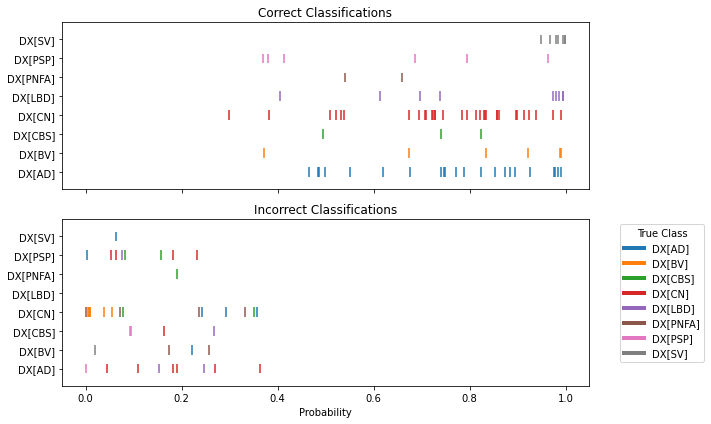

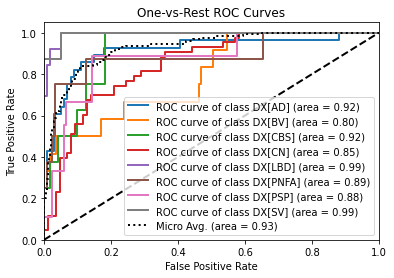

Optimal Thresholds: 
 {0: 0.2213381804019639, 1: 0.3722093223391697, 2: 0.07723019114769508, 3: 0.5081259133909125, 4: 0.074980135764246, 5: 0.07210080120665946, 6: 0.09303501656476655, 7: 0.018941248398291054}


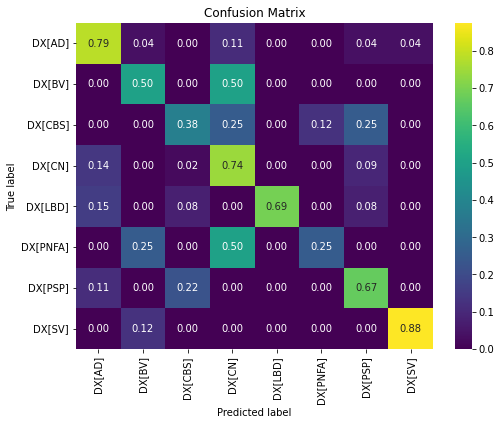

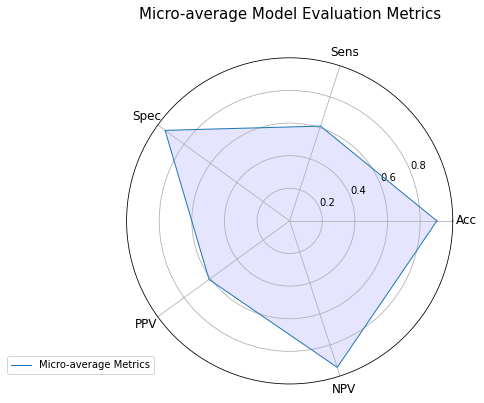

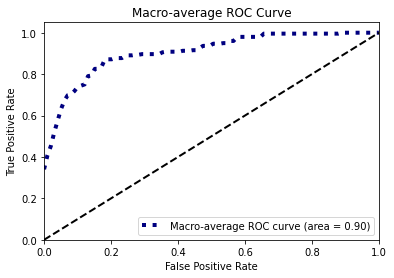

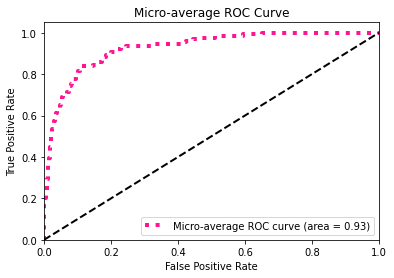

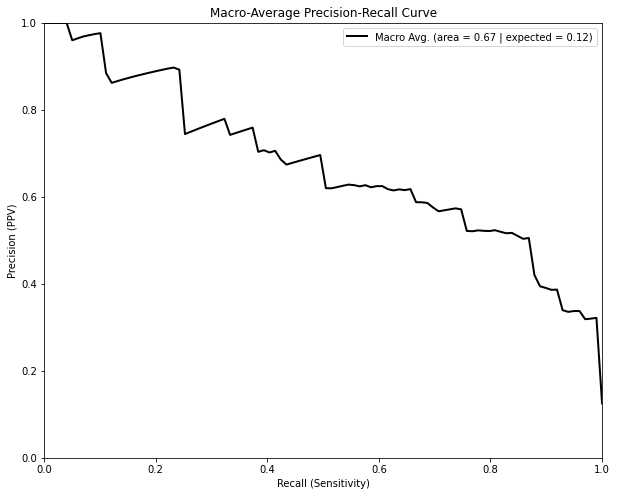

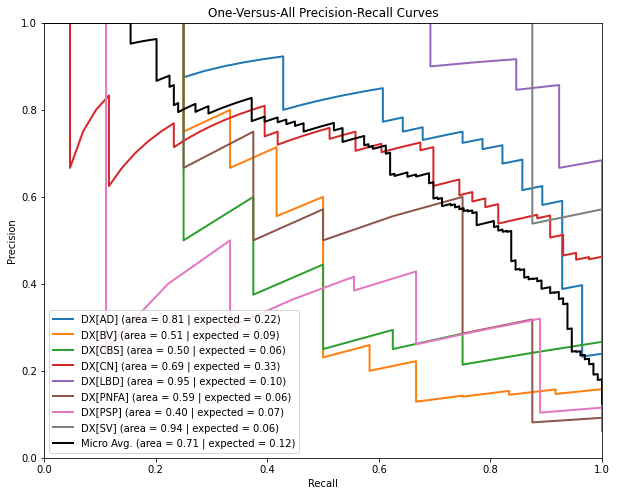

In [26]:
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
loocv_evaluator = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=results.predict(other_design_matrix), observation_df=other_outcome_matrix, normalization='true', thresholds=None, out_dir='/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_5/results/ctrl_vs_dz/test')
loocv_evaluator.run() 

Get One Vs. All Confidence Intervals on AUC

In [ ]:
df, bootstrap = ComprehensiveMulticlassROC.bootstrap_ovr_auroc(raw_observations=loocv_evaluator.raw_observations, raw_predictions=loocv_evaluator.raw_predictions, outcome_matrix_cols=loocv_evaluator.outcome_matrix.columns)
ComprehensiveMulticlassROC.plot_ovr_auc_with_ci(df, out_dir='/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_5/results/ctrl_vs_dz/test')

In [ ]:
display(df)

Get Confidence Intervals on Sensitivity, Specificity, NPV, PPV, and Accuracy for Each Class

In [36]:
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd

def calculate_youden(
    raw_observations: np.ndarray,
    raw_predictions: np.ndarray,
    outcome_matrix_cols
):
    """
    Calculates Youden's J for each class, and bootstraps Sensitivity, Specificity, NPV, PPV, and Accuracy
    at the corresponding cut point. Returns a summary DataFrame for each class.

    Parameters
    ----------
    raw_observations : np.ndarray
        Ground truth one-hot encoded array of shape (n_samples, n_classes).
    raw_predictions : np.ndarray
        Predicted probabilities for each class of shape (n_samples, n_classes).
    outcome_matrix_cols : list-like
        The column (class) labels, typically from `outcome_matrix.columns`.

    Returns
    -------
    metrics_dfs : dict
        two dictionaries where keys are class names are keys. values for first are youden's j, values for second are threhsold for each youdens j
    """
    n_classes = raw_observations.shape[1]

    youden_dict = {}
    threshold_dict = {}
    for i in range(n_classes):
        class_name = outcome_matrix_cols[i]
        y_true = raw_observations[:, i]
        y_score = raw_predictions[:, i]

        # Calculate the optimal threshold using Youden's J
        fpr, tpr, thresholds = roc_curve(y_true, y_score)
        youden_j = tpr - fpr
        optimal_idx = np.argmax(youden_j)
        optimal_threshold = thresholds[optimal_idx]

        # Store the summary DataFrame for the current class
        youden_dict[class_name] = youden_j[optimal_idx]
        threshold_dict[class_name] = optimal_threshold
    return youden_dict, threshold_dict

def calculate_metrics_at_threshold(
    raw_observations: np.ndarray,
    raw_predictions: np.ndarray,
    outcome_matrix_cols,
    threshold_dict,
    n_bootstraps: int = 1000,
    random_state: int = None,
    ci_alpha: float = 0.95
):
    """
    Calculates Youden's J for each class, and bootstraps Sensitivity, Specificity, NPV, PPV, and Accuracy
    at the corresponding cut point. Returns a summary DataFrame for each class.

    Parameters
    ----------
    raw_observations : np.ndarray
        Ground truth one-hot encoded array of shape (n_samples, n_classes).
    raw_predictions : np.ndarray
        Predicted probabilities for each class of shape (n_samples, n_classes).
    outcome_matrix_cols : list-like
        The column (class) labels, typically from `outcome_matrix.columns`.
    threshold_dict : dict
        the dictionary where keys correspond to classes and values correspond to thresholds to evaluate 
    n_bootstraps : int
        Number of bootstrap iterations.
    random_state : int
        Controls reproducibility of the random sampling.
    ci_alpha : float
        Confidence interval coverage (0 < ci_alpha < 1). 0.95 -> 95% CI.

    Returns
    -------
    metrics_dfs : dict
        A dictionary where keys are class names and values are DataFrames with rows
        as metrics (Sensitivity, Specificity, NPV, PPV, Accuracy) and columns as
        mean, lower bound, and upper bound.
    """
    rng = np.random.default_rng(seed=random_state)
    n_classes = raw_observations.shape[1]

    metrics_dfs = {}
    for i in range(n_classes):
        class_name = outcome_matrix_cols[i]
        y_true = raw_observations[:, i]
        y_score = raw_predictions[:, i]
        optimal_threshold = threshold_dict[class_name]

        # Call a helper function to calculate bootstrapped metrics
        metrics_summary = bootstrap_metrics_at_cutpoint(y_true, y_score, optimal_threshold, n_bootstraps, rng, ci_alpha)

        # Store the summary DataFrame for the current class
        metrics_dfs[class_name] = metrics_summary
    return metrics_dfs

def calculate_youden_and_metrics(
    raw_observations: np.ndarray,
    raw_predictions: np.ndarray,
    outcome_matrix_cols,
    n_bootstraps: int = 1000,
    random_state: int = None,
    ci_alpha: float = 0.95
):
    """
    Calculates Youden's J for each class, and bootstraps Sensitivity, Specificity, NPV, PPV, and Accuracy
    at the corresponding cut point. Returns a summary DataFrame for each class.

    Parameters
    ----------
    raw_observations : np.ndarray
        Ground truth one-hot encoded array of shape (n_samples, n_classes).
    raw_predictions : np.ndarray
        Predicted probabilities for each class of shape (n_samples, n_classes).
    outcome_matrix_cols : list-like
        The column (class) labels, typically from `outcome_matrix.columns`.
    n_bootstraps : int
        Number of bootstrap iterations.
    random_state : int
        Controls reproducibility of the random sampling.
    ci_alpha : float
        Confidence interval coverage (0 < ci_alpha < 1). 0.95 -> 95% CI.

    Returns
    -------
    metrics_dfs : dict
        A dictionary where keys are class names and values are DataFrames with rows
        as metrics (Sensitivity, Specificity, NPV, PPV, Accuracy) and columns as
        mean, lower bound, and upper bound.
    """
    rng = np.random.default_rng(seed=random_state)
    n_classes = raw_observations.shape[1]

    metrics_dfs = {}
    print("--Optimal Threshold--")
    for i in range(n_classes):
        class_name = outcome_matrix_cols[i]
        y_true = raw_observations[:, i]
        y_score = raw_predictions[:, i]

        # Calculate the optimal threshold using Youden's J
        fpr, tpr, thresholds = roc_curve(y_true, y_score)
        youden_j = tpr - fpr
        optimal_idx = np.argmax(youden_j)
        optimal_threshold = thresholds[optimal_idx]

        # Call a helper function to calculate bootstrapped metrics
        metrics_summary = bootstrap_metrics_at_cutpoint(
            y_true, y_score, optimal_threshold, n_bootstraps, rng, ci_alpha
        )
        print(f"{class_name}: {optimal_threshold}")

        # Store the summary DataFrame for the current class
        metrics_dfs[class_name] = metrics_summary
    return metrics_dfs


def bootstrap_metrics_at_cutpoint(
    y_true: np.ndarray,
    y_score: np.ndarray,
    cutpoint: float,
    n_bootstraps: int,
    rng,
    ci_alpha: float
):
    """
    Bootstraps Sensitivity, Specificity, NPV, PPV, and Accuracy at a given cut point.

    Parameters
    ----------
    y_true : np.ndarray
        Ground truth binary labels.
    y_score : np.ndarray
        Predicted probabilities for the positive class.
    cutpoint : float
        The threshold at which to calculate the metrics.
    n_bootstraps : int
        Number of bootstrap iterations.
    rng : np.random.Generator
        Random number generator for reproducibility.
    ci_alpha : float
        Confidence interval coverage (0 < ci_alpha < 1). 0.95 -> 95% CI.

    Returns
    -------
    metrics_summary_df : pd.DataFrame
        DataFrame with rows as metrics (Sensitivity, Specificity, NPV, PPV, Accuracy)
        and columns as mean, lower bound, and upper bound.
    """
    metrics = {"Sensitivity": [], "Specificity": [], "NPV": [], "PPV": [], "Accuracy": []}

    n_samples = len(y_true)

    for _ in range(n_bootstraps):
        # Sample with replacement
        idx = rng.integers(0, n_samples, n_samples)
        y_true_boot = y_true[idx]
        y_score_boot = y_score[idx]

        # Convert probabilities to binary predictions using the cutpoint
        y_pred_boot = (y_score_boot >= cutpoint).astype(int)

        # Calculate confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_true_boot, y_pred_boot).ravel()

        # Calculate metrics
        sens = tp / (tp + fn) if (tp + fn) > 0 else np.nan  # Sensitivity
        spec = tn / (tn + fp) if (tn + fp) > 0 else np.nan  # Specificity
        ppv = tp / (tp + fp) if (tp + fp) > 0 else np.nan  # Positive Predictive Value
        npv = tn / (tn + fn) if (tn + fn) > 0 else np.nan  # Negative Predictive Value
        acc = accuracy_score(y_true_boot, y_pred_boot)     # Accuracy

        metrics["Sensitivity"].append(sens)
        metrics["Specificity"].append(spec)
        metrics["NPV"].append(npv)
        metrics["PPV"].append(ppv)
        metrics["Accuracy"].append(acc)

    # Calculate mean, lower bound, and upper bound for each metric
    rows = []
    alpha_lower = (1.0 - ci_alpha) / 2.0
    alpha_upper = 1.0 - alpha_lower

    for metric, values in metrics.items():
        values_clean = [v for v in values if not np.isnan(v)]
        if len(values_clean) == 0:
            rows.append([metric, np.nan, np.nan, np.nan])
        else:
            mean_val = np.mean(values_clean)
            lower_bound = np.quantile(values_clean, alpha_lower)
            upper_bound = np.quantile(values_clean, alpha_upper)
            rows.append([metric, mean_val, lower_bound, upper_bound])

    metrics_summary_df = pd.DataFrame(
        rows, columns=["Metric", "Mean", f"{alpha_lower:.3g}%", f"{alpha_upper:.3g}%"]
    ).set_index("Metric")

    return metrics_summary_df

def save_dfs(dfs:dict, out_dir=None):
    for name, df in dfs.items():
        if out_dir is not None:
            df.to_csv(out_dir + '/' + name + '.csv')

In [37]:
dfs = calculate_youden_and_metrics(raw_observations=loocv_evaluator.raw_observations, raw_predictions=loocv_evaluator.raw_predictions, outcome_matrix_cols=loocv_evaluator.outcome_matrix.columns)
save_dfs(dfs, out_dir='/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_5/results/test/metrics')
print()

Get Overall Micro Average AUC

In [ ]:
loocv_evaluator.get_micro_auc()

In [71]:

###----- Functionally Programmed Functions for Evaluation Using Above Classes -----##
'''
Hanging imports to facilitate easy transplant of code.
'''
import numpy as np
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
from calvin_utils.statistical_utils.logistic_regression import LogisticRegression
import os
from contextlib import redirect_stdout, redirect_stderr
from tqdm import tqdm

def resample_df(data_df):
    n_samples = data_df.shape[0]
    # Shuffle the indices
    shuffled_indices = np.random.permutation(n_samples)
    # Reorder the DataFrame based on the shuffled indices but keep the original index
    shuffled_df = data_df.iloc[shuffled_indices].reset_index(drop=True).set_index(data_df.index)
    return shuffled_df

def permute_auc_difference(data_df, formula1, formula2, cal_palm, n_iterations=1000):
    auc_diffs = []
    for i in tqdm(range(n_iterations)):
        try:
            with open(os.devnull, 'w') as fnull, redirect_stdout(fnull), redirect_stderr(fnull):
                # Define design matrices and outcome matrices for both formulas
                outcome_matrix, design_matrix1 = cal_palm.define_design_matrix(formula1, data_df)
                _, design_matrix2 = cal_palm.define_design_matrix(formula2, data_df)
                
                # Permute the outcomes
                if i == 0:
                    resampled_df = outcome_matrix
                else:
                    resampled_df = resample_df(outcome_matrix)

                # Fit the logistic regression model for the first formula
                logreg1 = LogisticRegression(resampled_df, design_matrix1)
                results1 = logreg1.run()

                # Fit the logistic regression model for the second formula
                logreg2 = LogisticRegression(resampled_df, design_matrix2)
                results2 = logreg2.run()

                # Evaluate the models
                evaluator1 = ComprehensiveMulticlassROC(fitted_model=results1, observation_df=resampled_df, normalization='true', thresholds=None, out_dir=None)
                micro_auc1 = evaluator1.get_micro_auc()

                evaluator2 = ComprehensiveMulticlassROC(fitted_model=results2, observation_df=resampled_df, normalization='true', thresholds=None, out_dir=None)
                micro_auc2 = evaluator2.get_micro_auc()

                # Store the difference in micro-average AUCs
                if i == 0:
                    obs_diff = micro_auc1 - micro_auc2
                    print(f"F1: {micro_auc1} | F2: {micro_auc2}")
                else:
                    auc_diffs.append(micro_auc1 - micro_auc2)
            
        except Exception as e:
            print(e)
            continue
    # Calculate p-value based on the distribution of differences
    auc_diffs = np.array(auc_diffs)
    p_value = np.mean(auc_diffs >= obs_diff)

    # Calculate confidence intervals for the difference
    lower_ci = np.percentile(auc_diffs, 2.5)
    upper_ci = np.percentile(auc_diffs, 97.5)
    
    return obs_diff, lower_ci, upper_ci, p_value

def bootstrap_auc(outcome_matrix, design_matrix, n_iterations=1000, model=None):
    auc_scores = []
    n_samples = outcome_matrix.shape[0]
    
    for i in tqdm(range(n_iterations)):
        # Suppress both stdout and stderr
        try:
            with open(os.devnull, 'w') as fnull, redirect_stdout(fnull), redirect_stderr(fnull):
                # Generate a bootstrap sample
                resample_idx = np.random.choice(n_samples, size=n_samples, replace=True)
                outcome_matrix_resampled = outcome_matrix.iloc[resample_idx]
                design_matrix_resampled = design_matrix.iloc[resample_idx]

                # Fit the logistic regression model
                if model is None:
                    logreg = LogisticRegression(outcome_matrix_resampled, design_matrix_resampled)
                    results = logreg.run()
                    test = ComprehensiveMulticlassROC(fitted_model=results, observation_df=outcome_matrix_resampled, normalization='true', thresholds=None, out_dir=None)
                else:
                    results = model.predict(design_matrix_resampled)
                    test = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=results, observation_df=outcome_matrix_resampled, normalization='true', thresholds=None, out_dir=None)
                # Evaluate the model
                micro_auc = test.get_micro_auc()
                auc_scores.append(micro_auc)
        except:
            continue
    # Calculate confidence intervals
    lower_ci = np.percentile(auc_scores, 2.5)
    upper_ci = np.percentile(auc_scores, 97.5)    
    return np.mean(auc_scores), lower_ci, upper_ci, auc_scores


Bootstrap the Micro Average AUC

In [ ]:
import matplotlib
# from calvin_utils.statistical_utils.classification_statistics import bootstrap_auc
matplotlib.use('Agg')  # Use a non-interactive backend
mean_auc, lower_ci, upper_ci, auc_dist = bootstrap_auc(other_outcome_matrix, other_design_matrix, n_iterations=1000, model=results)
print(f'Mean AUC: {mean_auc}, 95% CI: ({lower_ci}, {upper_ci})')

In [ ]:
import pandas as pd
auc_df = pd.DataFrame({'val':auc_dist})
auc_df.to_csv('/path/to/df.csv')

In [ ]:
auc_df = pd.read_csv('/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/diagnostic_ability/50fit_150pred/auc_dist.csv')

In [ ]:
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu

def compare_bootstrapped_means(distribution1, distribution2):
    """
    Compares two bootstrapped distributions using a two-sample t-test and Mann-Whitney U test.
    
    Parameters:
    - distribution1 (list or array): Bootstrapped distribution of group 1.
    - distribution2 (list or array): Bootstrapped distribution of group 2.
    
    Returns:
    - t_stat (float): t-statistic from the two-sample t-test.
    - t_p_value (float): p-value from the two-sample t-test.
    - u_stat (float): U-statistic from the Mann-Whitney U test.
    - u_p_value (float): p-value from the Mann-Whitney U test.
    """
    # Perform a two-sample t-test to compare means
    t_stat, t_p_value = ttest_ind(distribution1, distribution2)
    
    # Perform a Mann-Whitney U test to compare distributions
    u_stat, u_p_value = mannwhitneyu(distribution1, distribution2)

    return t_stat, t_p_value, u_stat, u_p_value

# Compare the distributions
t_stat, t_p_value, u_stat, u_p_value = compare_bootstrapped_means(auc_df['CSF AUCs'], auc_df['CTh AUCs'])

print(f"Two-sample t-test: t-stat = {t_stat:.4f}, p-value = {t_p_value:.4f}")
print(f"Mann-Whitney U test: U-stat = {u_stat:.4f}, p-value = {u_p_value:.4f}")


Plot Bootstraps

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_custom_bootstrap_auc(df):
    """
    Plots the mean and error bars of AUCs for each column in the DataFrame using Seaborn and Matplotlib,
    styled similarly to the reference plot.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing bootstrapped AUC distributions. 
                         Each column represents a different group.
    """
    # Initialize lists to store plotting data
    means = []
    lower_errors = []
    upper_errors = []
    y_labels = []

    # Calculate mean and confidence intervals for each column in the DataFrame, ignoring NaNs
    for column in df.columns:
        bootstrapped_values = df[column].dropna()  # Remove NaN values
        if len(bootstrapped_values) > 0:
            mean_value = np.mean(bootstrapped_values)
            lower_ci = np.percentile(bootstrapped_values, 2.5)
            upper_ci = np.percentile(bootstrapped_values, 97.5)
            
            means.append(mean_value)
            lower_errors.append(mean_value - lower_ci)
            upper_errors.append(upper_ci - mean_value)
            y_labels.append(column)

    # Create a horizontal scatter plot with error bars
    plt.figure(figsize=(6, len(means) * 1.2))  # Adjust height based on number of groups
    sns.set(style="whitegrid")
    
    # Assign colors from a color palette
    palette = sns.color_palette("tab10", len(means))

    # Plot the means as points with error bars
    for i, (mean, lower_err, upper_err, label) in enumerate(zip(means, lower_errors, upper_errors, y_labels)):
        plt.errorbar(x=mean, y=i, xerr=[[lower_err], [upper_err]], fmt='o', color=palette[i], capsize=5, markersize=10)
    
    # Customize y-ticks to match labels
    plt.yticks(range(len(y_labels)), y_labels)
    
    # Labels and title
    plt.xlabel('AUC')
    plt.ylabel('CAD Product')
    plt.title('Mean AUC with 95% CI for CAD Products')

    # Customize the grid and layout
    plt.grid(False)
    plt.xlim(0.4, 1.0)  # Set x-axis limits for AUC

    # Display the plot
    plt.tight_layout()
    plt.show()
    plt.savefig(out_dir + '/95ci.svg')

plot_custom_bootstrap_auc(auc_df)

Permutation Test Two AUCs

In [ ]:
other_df.columns

In [ ]:
f1 = "Diagnosis ~ CSF_Frontal + CSF_Temporal + CSF_Parietal + CSF_Occipital + CSF_MTL + CSF_Cerebellum + CSF_Subcortex"
f2 = "Diagnosis ~ GM_Frontal + GM_Temporal + GM_Parietal + GM_Occipital + GM_MTL + GM_Cerebellum + GM_Subcortex"

In [ ]:
# from calvin_utils.statistical_utils.classification_statistics import permute_auc_difference
obs_diff, lower_ci, upper_ci, p_value = permute_auc_difference(other_df, formula1=f1, 
                                                                  formula2=f2,
                                                                  cal_palm=cal_palm, n_iterations=1000)
print(f'Observed AUC Difference: {obs_diff}, 95% CI: ({lower_ci}, {upper_ci}), p-value: {p_value}')